In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file = open("Min Wage Comp 2016.xlsx", "r")
df = pd.read_excel("Baylor Religion Survey, Wave VI (2021).xlsx")
df = df[['Q33G','I_RELIGION']]
climate_labels = {
    1: "Strongly Oppose",
    2: "Oppose",
    3: "Favor",
    4: "Strongly Favor",
}

religion_labels = {
    1: "Evangelical Protestant",
    2: "Mainline Protestant",
    3: "Black Protestant",
    4: "Catholic",
    5: "Other",
    6: "Non-affiliated"
}
# Replace numeric codes with category labels (if applicable)
df['Climate'] = df['Q33G'].map(climate_labels)
df['I_RELIGION'] = df['I_RELIGION'].map(religion_labels)
df = df[['Climate','I_RELIGION']]

# Drop rows with NaN values after mapping
df = df.dropna(subset=['I_RELIGION','Climate'])
df


,Climate,I_RELIGION
1,Strongly Favor,Catholic
2,Favor,Evangelical Protestant
3,Strongly Favor,Mainline Protestant
4,Strongly Favor,Catholic
5,Strongly Favor,Evangelical Protestant
...,...,...
1243,Strongly Favor,Non-affiliated
1244,Favor,Mainline Protestant
1245,Strongly Favor,Non-affiliated
1246,Strongly Favor,Mainline Protestant


In [247]:
climate_order = ["Strongly Oppose", "Oppose", "Favor", "Strongly Favor"]
religion_order = ["Evangelical Protestant", "Mainline Protestant", "Black Protestant", "Catholic", "Non-affiliated", "Other"]
df['Climate'] = pd.Categorical(df['Climate'], categories=climate_order, ordered=True)
df['I_RELIGION'] = pd.Categorical(df['I_RELIGION'], categories=religion_order, ordered=True)

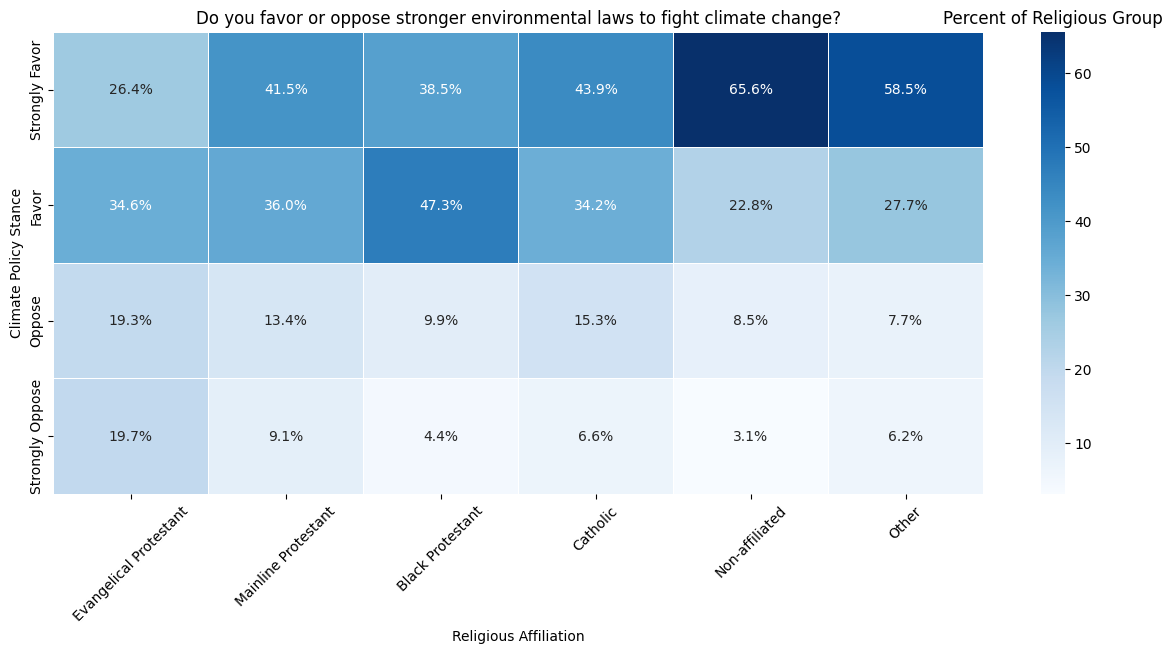

In [248]:
crosstab = pd.crosstab(df['Climate'], df['I_RELIGION'], normalize="columns") * 100
plt.figure(figsize=(15, 6))
heatmap = sns.heatmap(crosstab, annot=True, fmt=".1f", cmap="Blues", linewidths=0.5)

for t in heatmap.texts:
    t.set_text(f'{float(t.get_text()):.1f}%')

cbar = plt.gcf().axes[-1]
cbar.set_title('Percent of Religious Group')
cbar.title.set_position([0.5, 1.05]) 
plt.xlabel("Religious Affiliation")
plt.ylabel("Climate Policy Stance")
plt.title("Do you favor or oppose stronger environmental laws to fight climate change?")
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.show()

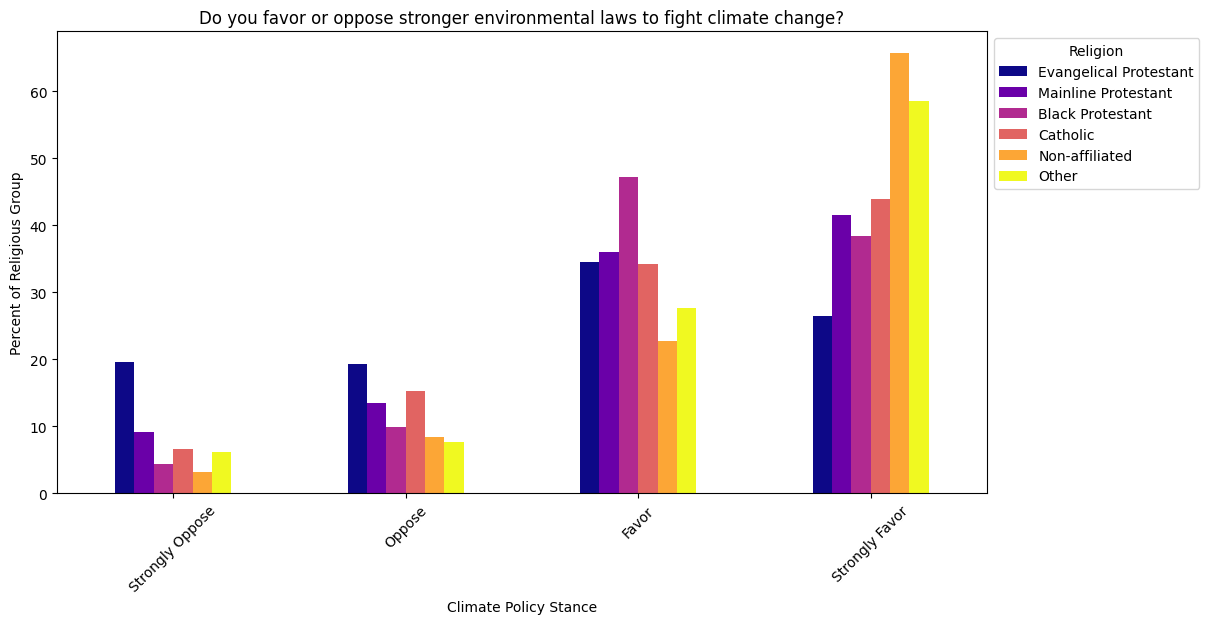

In [256]:
crosstab = pd.crosstab(df['Climate'], df['I_RELIGION'], normalize="columns") * 100
# Plot grouped bar chart
crosstab.loc[climate_order, religion_order].plot(kind='bar', figsize=(12, 6), colormap="plasma")
# Labels and title
plt.xlabel("Climate Policy Stance")
plt.ylabel("Percent of Religious Group")
plt.title("Do you favor or oppose stronger environmental laws to fight climate change?")
plt.legend(title="Religion", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()